# TS3: MODELIZACIÓN DE UN ADC

### Miranda Viceconte 

### CONVERSOR ADC

En esta tarea, el objetivo es simular un conversor analógico a digital (AD). El esquema siguiente muestra los pasos que realiza un conversor AD, y este es el modelo que buscamos replicar. El proceso comienza con la discretización del tiempo mediante el muestreo, seguido de la cuantización de la señal en amplitud y, finalmente, la codificación de la señal en formato binario para que pueda ser entendida por la computadora.

El objetivo es simular una señal lo más realista posible. Para ello, además de una señal limpia, introduciremos un ruido analógico antes de que la señal ingrese al conversor, lo que permitirá emular de manera más precisa el comportamiento de señales en entornos reales.

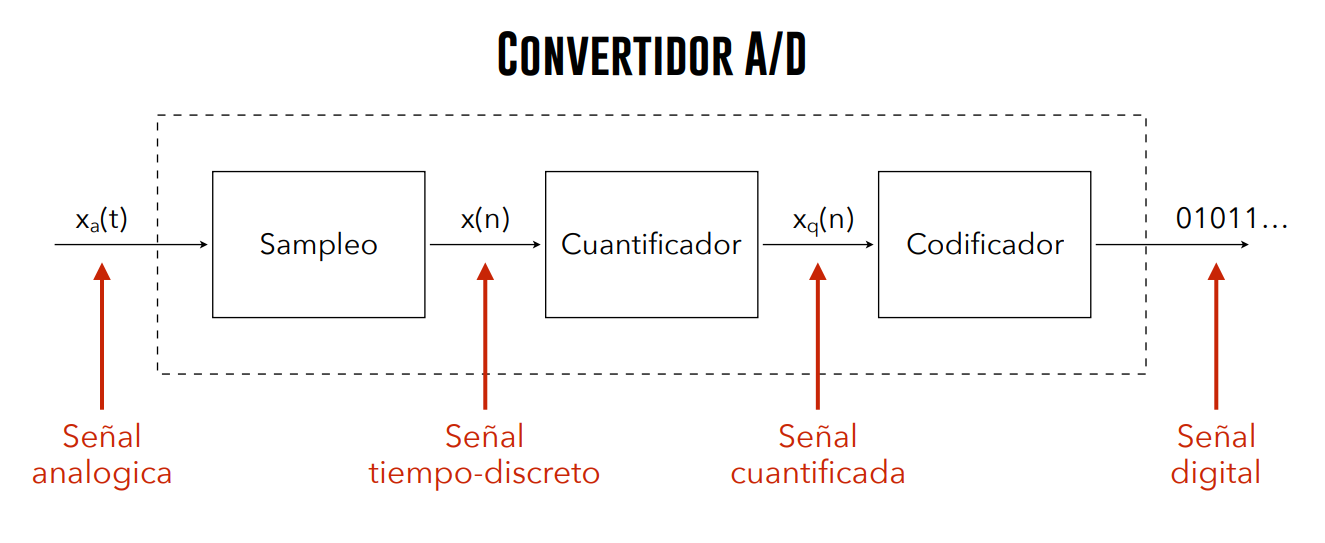

Antes de presentar el código, es importante entender conceptos clave sobre muestreo, sampling y análisis espectral mediante la Transformada de Fourier. Esto facilitará el seguimiento del paso a paso del código y permitirá comprender mejor el marco teórico de lo que se desea modelar.

1. Muestreo (Sampling)

El muestreo es el proceso mediante el cual una señal analógica, continua en el tiempo, se convierte en una señal discreta. Esto se logra al tomar muestras de la señal original en instantes específicos, separados por un intervalo de tiempo constante. La frecuencia con la que se toman estas muestras se conoce como frecuencia de muestreo $ f_s $ que indica cuántas muestras por segundo se capturan de la señal.

Desde un punto de vista matemático, el muestreo puede modelarse como la multiplicación de la señal original por un tren de impulsos, donde cada impulso representa una muestra tomada en un instante determinado. En la mayoría de los análisis teóricos, estos impulsos se modelan mediante funciones delta de Dirac $ δ(t) $, lo que nos permite entender el efecto del muestreo en el dominio de la frecuencia.

Cuando realizamos el muestreo de una señal en el dominio del tiempo, en el dominio de la frecuencia esto se traduce en una convolución del espectro original de la señal con el espectro del tren de impulsos. Debido a que el espectro de un tren de impulsos es otro tren de impulsos, la señal muestreada tendrá su espectro original repetido periódicamente cada 
$ f_s $ 

Esto significa que la frecuencia de muestreo impone un límite superior en la máxima frecuencia que podemos representar sin que haya superposición entre las copias del espectro. Este límite se conoce como la frecuencia de Nyquist y está dado por: 
$$ f_N= \frac{f_s}{2} $$

Para evitar distorsiones en la señal digitalizada, la frecuencia de muestreo debe ser al menos el doble de la frecuencia fundamental $ f_0$ contenida en la señal original.
$$ f_s >= 2f_0 $$

Si no se cumple la condición anterior, los espectros periódicos generados por el muestreo se solapan entre sí, produciendo un fenómeno conocido como aliasing. El aliasing provoca que las frecuencias altas de la señal original aparezcan reflejadas como frecuencias más bajas en la señal muestreada, introduciendo distorsiones irreversibles que impiden recuperar la señal original.

Una consecuencia importante de la frecuencia de muestreo es la resolución espectral de la señal muestreada. La resolución espectral $Δf$ está determinada por la relación entre la frecuencia de muestreo $f_s$ y el número total de muestras $N$ que se toman para la señal. Matemáticamente, la resolución espectral es:
$$ Δf= \frac{f_s}{N} $$
Esta resolución indica cuán finos son los intervalos de frecuencia que podemos distinguir en el espectro de la señal. A medida que $N$ aumenta, es decir, se capturan más muestras, la resolución espectral mejora, lo que permite una representación más precisa de las frecuencias presentes en la señal. Sin embargo, si la frecuencia de muestreo es demasiado baja o el número de muestras es insuficiente, la capacidad de resolver componentes de frecuencia finos se ve comprometida, y el análisis espectral puede volverse impreciso, contribuyendo al aliasing y a la pérdida de información.


2. Cuantización

En la cuantificación, una señal analógica se convierte en una señal digital mediante discretización en amplitud (niveles de cuantificación).
El paso de cuantizacion q se calcula como: 
$$ q= \frac{V_f}{2^{B-1}}$$
Donde $V_f$ es el rango del voltaje del ADC, es decir, la señal de entrada se encuentra en el intervalo y $B$ la cantidad de bits del ADC. 
El rango de la señal se divide en niveles de cuantización (o escalones), donde la cantidad de niveles está determinada por $B$  A mayor cantidad de bits, mayor resolución, ya que hay más pasos de cuantización y menor error en la representación de la señal digital.
La cuantización introduce un error, conocido como ruido de cuantización, cuyo nivel depende de $B$ Este error se define como la diferencia entre la señal analógica original y la señal cuantificada:
$$ x_n(n)= x(t) + n_q(n) $$ 
Donde: 
* $x_n(n)$ es la señal cuantificada
* $x(t)$ es la señal analogica
* $ n_q(n) $ que es un proceso aleatorio debido a la aproximación de valores en los niveles de cuantización.

En un ADC ideal, el ruido de cuantización sigue una distribución uniforme en el rango [−q/2,q/2], lo que significa que todos los valores dentro de ese intervalo tienen igual probabilidad. 
De aca, la esperanza o el valor medio y la varianza y el desvio estandar:  
$$ E[n_q] = 0 \quad  Variana[n_q]= \frac{q^2}{12}=\sigma^2 \quad  \sigma=\frac{q}{12} $$ 

La potencia es la varianza para una señal estacionaria. 
$$ P= \sigma^2 $$ 

Se habla de potencia del ruido porque, en sistemas de telecomunicaciones y procesamiento de señales, el ruido afecta la calidad de la señal y se mide en términos de potencia. Dado que el ruido de cuantización se modela como una señal aleatoria, su impacto se evalúa usando su potencia, que es proporcional al número de bits del ADC. Este resultado es importante porque la potencia del ruido determina la relación señal a ruido (SNR) en un sistema de cuantificación.

3. Normalizacion y relacion señal-ruido (SNR) 

Antes de la cuantificacion, se suele nromalizar la señal para que tenga una potencia promedio de 1w, esto se logra dividiendo la señal por su desvio estandar. 
$$ x_n(t) =\frac{x(t)}{\sigma} $$ 
Como se nombro previamente, la potencia de una señal es equivalente a su varianza. 
$$ P_x= \sigma^2 = 1 $$

Esta normalización es clave para garantizar que la señal se ajuste adecuadamente al rango del ADC sin saturarlo y para permitir comparaciones justas para señales de distintas amplititudes en términos de relación señal-ruido (SNR). La normalización asegura que todas las señales sean evaluadas en igualdad de condiciones.

Debido a la propiedad previamente detallada del ruido de cuantización $n_q$, que tiene esperanza cero y sigue una distribución uniforme, se considera incorrelado con la señal cuando el número de bits de cuantificación $B$ es suficientemente grande. Esto significa que el ruido de cuantización no introduce una perturbación predecible en la señal original. En otras palabras, no hay un patrón sistemático que haga que la señal digitalizada sea consistentemente más alta o más baja que la señal original.

El proceso de cuantificación consiste en redondear el valor de la señal a los niveles de cuantización más cercanos, sin ninguna preferencia particular, lo que hace que el ruido de cuantización sea aleatorio. Por tanto, este ruido no sigue una regla predecible, sino que es impredecible y tiene una distribución uniforme.

La noción de incorrelación significa que el ruido de cuantización no está relacionado directamente con la señal original. Es decir, su valor no depende de la amplitud o frecuencia de la señal que se está digitalizando, lo que lo convierte en un ruido aleatorio. En términos estadísticos, el ruido de cuantización es independiente de la señal, lo que permite que se trate como un componente de ruido adicional que no altera la estructura de la señal original, siempre que el número de bits sea suficientemente alto.

En estos casos, la potencia total de la señal cuantificada $x(n)$se puede expresar como la suma de las potencias de la señal original $ x(t)$ y el ruido $n_q$: 

$$ P_{xn}= P_x + P_{n_q}$$

Esta independencia entre señal y ruido permite definir la relación señal-ruido (SNR) de manera simple como:
$$ SNR = \frac{P_x}{P_{n_q}} $$
Si el ruido no fuera incorrelado con la señal (por ejemplo, en sistemas con errores sistemáticos o cuantificación con muy pocos bits), podría ocurrir que el ruido introduzca distorsiones estructurales en la señal, afectando su espectro de frecuencia y provocando artefactos no deseados en la señal cuantificada.

4. Analisis espectral: Transformada de Fourier

El análisis espectral es una técnica que permite estudiar cómo una señal varía con el tiempo, pero descomponiéndola en sus componentes de frecuencia. A través de este análisis, se pueden identificar las frecuencias presentes en la señal y cómo se distribuyen en amplitud. 
La transformada de Fourier es la herramienta matemática clave utilizada para el análisis espectral. Esta transformada permite convertir una señal del dominio del tiempo al dominio de la frecuencia. De forma más precisa, descompone una señal en una serie de componentes sinusoidales de diferentes frecuencias, amplitudes y fases. El resultado de la transformada de Fourier es una función compleja $X(f)$, que contiene información tanto sobre la amplitud como sobre la fase de las frecuencias presentes en la señal.

En el caso de las señales digitales, este análisis se realiza mediante la Transformada Rápida de Fourier (FFT, por sus siglas en inglés), que es una implementación eficiente de la Transformada Discreta de Fourier (DFT).

El espectro de frecuencias de la señal muestra cómo se distribuye su potencia entre diferentes frecuencias. En un sistema de muestreo, la señal se limita a las frecuencias dentro del rango de Nyquist, y el proceso de cuantización introduce ruido que se distribuye de manera uniforme a lo largo de todo el espectro, lo que generalmente se conoce como ruido de cuantización. Este ruido se puede observar en el análisis espectral como un incremento de la energía en las frecuencias altas, lo que indica que la cuantización ha afectado a las altas frecuencias de la señal.

### Modelado de conversor ADC: 4 bits Y $ K_n=1 $ 

Inicializacion de las librerías: 

In [11]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt


Funcion a importar: 

In [12]:
def mi_funcion_sen (vmax, dc, ff, ph, nn, fs):
    
    ts = 1/fs  # tiempo de muestreo
    
    # grilla de sampleo temporal ---> DISRETIZACION DEL TIEMPO (muestreo)
    tt = np.linspace(0, (nn-1)*ts, nn)  # Cambié N por nn
    
    # Grilla de amplitud
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc  # Sen (W0 . t + fase) // W0 = 2pi . t 
    
    return tt, xx
    

Datos de la simulacion :


In [13]:
#Datos para el muestreo (sampleo)
fs = 1000 # frecuencia de muestreo (Hz) conviene numero entero conocido 
N = 1000 # cantidad de muestras

#Proceso de CUANTIFICACION
# Datos del ADC
B = 4  # bits
Vf = 2 # rango simétrico de +/- Vf Volts
q =  Vf/2**(B-1) # paso de cuantización de q Volts

#Generacion de ruido
pot_ruido_cuant = (q**(2))/12  # Watts 
kn = 1 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df =  fs/N # resolución espectral

In [14]:
#%% Llamada a la función y procesamiento
tt, xx = mi_funcion_sen(vmax=2, dc=0, ff=1, ph=0, nn=N, fs=fs)

# Normalizamos la función con el desvío estándar
xn = xx / np.std(xx)
#De esta manera, la varianza es unitaria, y la potencia de 1

Generación del ruido analogico y ruido de cuantización :

In [15]:
# Señal analogica
analog_sig = xn

#Generacion de ruido analogico aleatorio
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)

#Señal analogica con ruido 
sr = analog_sig + nn 


#Señal cuantizada con ruido
srq = np.round(sr/q)*q 

#Ruido de cuantizacion
nq =  srq -sr 


Visualizacion de resultados: 

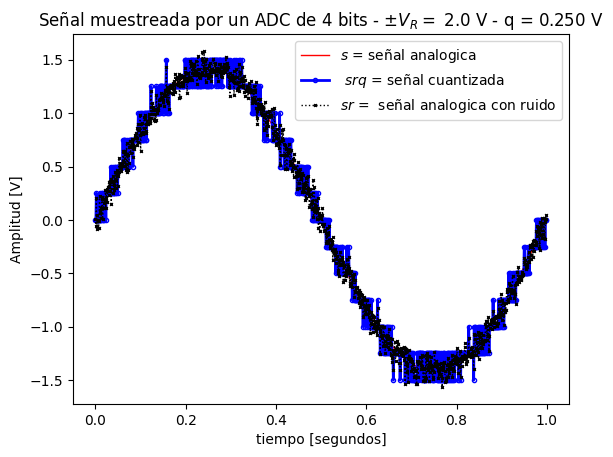

Text(0.5, 0, 'Error de cuantización\xa0(q)\xa0[V]')

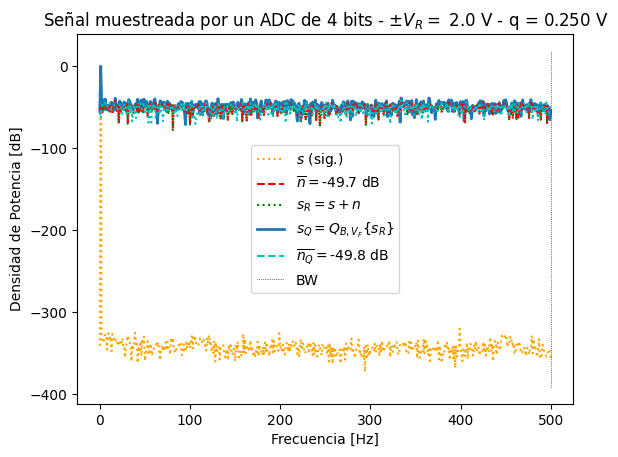

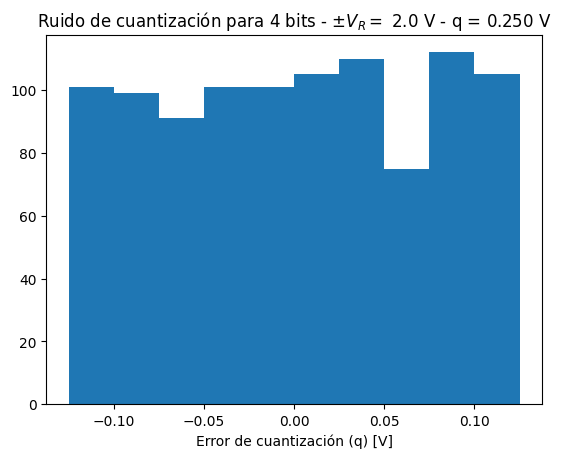

In [16]:
##################
# Señal temporal
##################

plt.figure(1)


#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')


plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


###########
# Espectro
###########

plt.figure(2)

ft_SR = 1/N*np.fft.fft( sr) 
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)
#Graficamos de 0 a nyquist, porque sabemos que la transformada tiene simetria en 0. 

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #Vector de n valores que hace que me quede con LA MITAD el vector, nos devuelve un verdadero o falso segun la condicion 

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

plt.xlabel('Error de cuantización (q) [V]')

### Variaciones de los parámetros del ADC

Para poder comprender como influye en la manipulacion de las señales la vairacion de los parametros del conversor vamos a modelizar 3 tipos de conversores: 
* $ B = 4   bits  \quad K_n= \frac{1}{10} $
* $ B = 8   bits  \quad K_n= 1 $
* $ B = 16   bits  \quad K_n= 10 $
Elijo comparar el modelo de 4 bits y 16 bits. 

### ADC 4 BITS $K_n=\frac{1}{10 }$

Como ya definimos previamente los parametros de la señal, solo vamos a volver a modelar el conversor. 

### Modelado del conversor

In [17]:
#Proceso de CUANTIFICACION
# Datos del ADC
B = 4  # bits
Vf = 2 # rango simétrico de +/- Vf Volts
q =  Vf/2**(B-1) # paso de cuantización de q Volts

#Generacion de ruido
pot_ruido_cuant = (q**(2))/12  # Watts 
kn = 1/10 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df =  fs/N # resolución espectral

# %% Llamada a la función y procesamiento
tt, xx = mi_funcion_sen(vmax=2, dc=0, ff=1, ph=0, nn=N, fs=fs)

# Normalizamos la función con el desvío estándar
xn = xx / np.std(xx)
#De esta manera, la varianza es unitaria, y la potencia de 1W

Generación del ruido analogico y ruido de cuantización :

In [18]:
# Señal analogica
analog_sig = xn

#Generacion de ruido analogico aleatorio
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)

#Señal analogica con ruido 
sr = analog_sig + nn 


#Señal cuantizada con ruido
srq = np.round(sr/q)*q 

#Ruido de cuantizacion
nq =  srq -sr 

Visualizacion de resultados: 

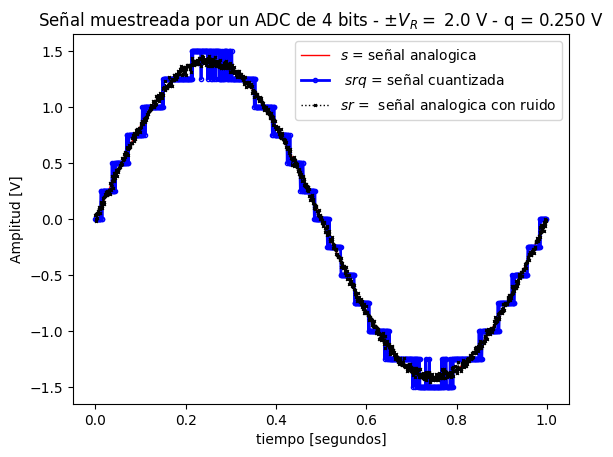

Text(0.5, 0, 'Pasos de cuantización\xa0(q)\xa0[V]')

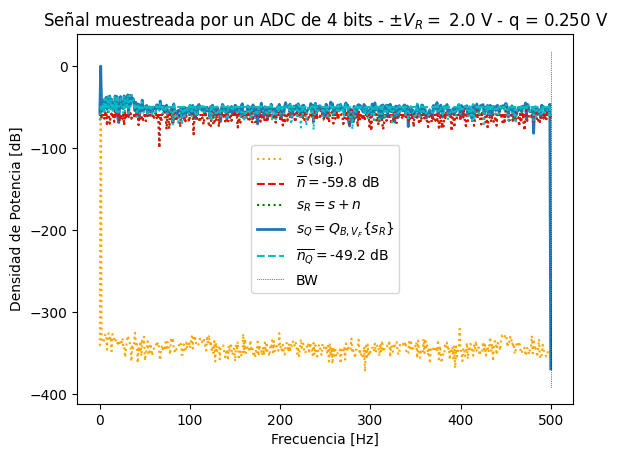

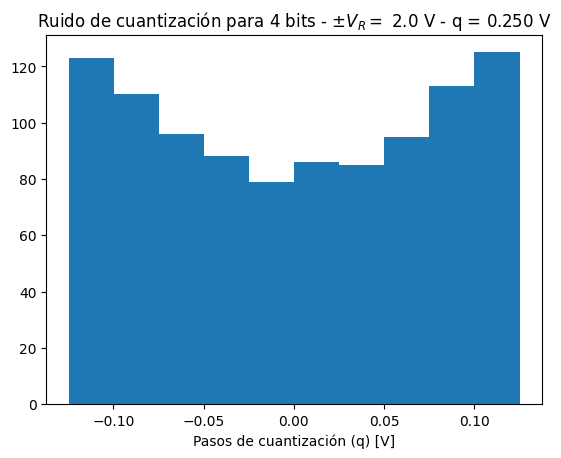

In [19]:
##################
# Señal temporal
##################

plt.figure(4)


#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')


plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


###########
# Espectro
###########

plt.figure(5)

ft_SR = 1/N*np.fft.fft( sr) 
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)
#Graficamos de 0 a nyquist, porque sabemos que la transformada tiene simetria en 0. 

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #Vector de n valores que hace que me quede con LA MITAD el vector, nos devuelve un verdadero o falso segun la condicion 

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(6)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

plt.xlabel('Pasos de cuantización (q) [V]')


### ADC 16 BITS $K_n=10$

### Modelado del conversor AD

In [20]:
#Proceso de CUANTIFICACION
# Datos del ADC
B = 16  # bits
Vf = 2 # rango simétrico de +/- Vf Volts
q =  Vf/2**(B-1) # paso de cuantización de q Volts

#Generacion de ruido
pot_ruido_cuant = (q**(2))/12  # Watts 
kn = 10 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df =  fs/N # resolución espectral

In [21]:
# %% Llamada a la función y procesamiento
tt, xx = mi_funcion_sen(vmax=2, dc=0, ff=1, ph=0, nn=N, fs=fs)

# Normalizamos la función con el desvío estándar
xn = xx / np.std(xx)
#De esta manera, la varianza es unitaria, y la potencia de 1W


Generacion de ruido analogico y de cuantizacion: 

In [22]:
# Señal analogica
analog_sig = xn

#Generacion de ruido analogico aleatorio
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)

#Señal analogica con ruido 
sr = analog_sig + nn 


#Señal cuantizada con ruido
srq = np.round(sr/q)*q 

#Ruido de cuantizacion
nq =  srq -sr 

Visualizacion de resultados: 

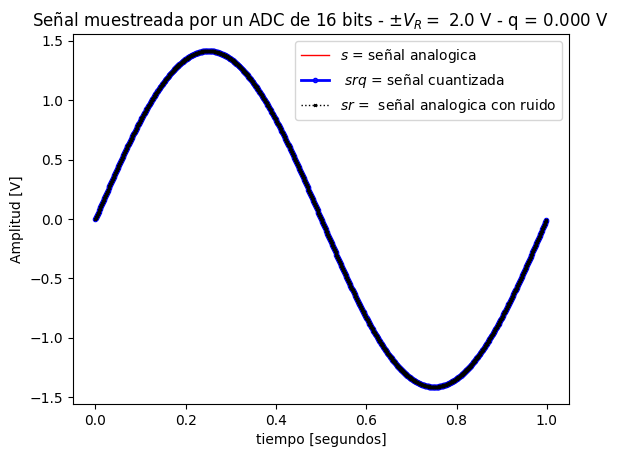

Text(0.5, 0, 'Pasos de cuantización\xa0(q)\xa0[V]')

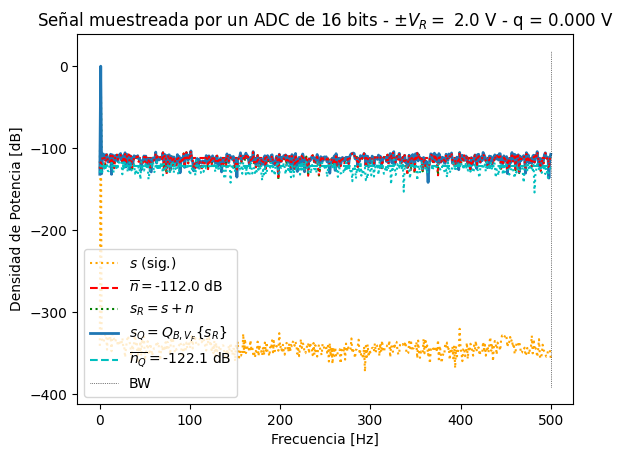

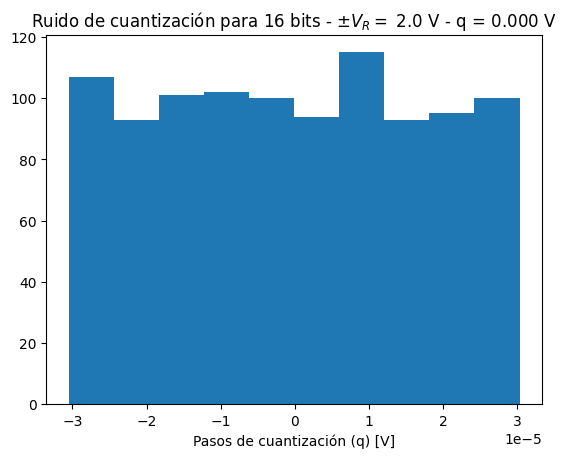

In [23]:
##################
# Señal temporal
##################

plt.figure(10)


#Grafico de la señal sin ruido
plt.plot(tt, analog_sig, lw=1,linestyle='-', color ="red", label='$ s $ = señal analogica' )
# Gráfico de señal cuantizada con ruido
plt.plot(tt, srq, lw=2, linestyle='-', color='blue', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label=' $ srq $ = señal cuantizada')
# Gráfico de señal analógica con ruido
plt.plot(tt, sr, lw=1, color='black', marker='x', linestyle='dotted', markersize=2, markerfacecolor='red', markeredgecolor='black', fillstyle='none', label='$ sr $ =  señal analogica con ruido')


plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()


###########
# Espectro
###########

plt.figure(11)

ft_SR = 1/N*np.fft.fft( sr) 
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)
#Graficamos de 0 a nyquist, porque sabemos que la transformada tiene simetria en 0. 

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #Vector de n valores que hace que me quede con LA MITAD el vector, nos devuelve un verdadero o falso segun la condicion 

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(12)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

plt.xlabel('Pasos de cuantización (q) [V]')

# Analisis de resultados: 

El número de bits B determina cuántos niveles de cuantización tiene el ADC. A mayor B, mayor es la resolución de la señal digitalizada y más pequeños son los pasos de cuantización 1. Esto significa que, para B=4, el paso de cuantización será relativamente grande, lo que reduce la precisión de la cuantización y puede introducir más ruido. Por el contrario, para  B=16, el paso de cuantización es mucho más pequeño, lo que mejora la precisión y reduce el ruido de cuantización. Podemos observar, que a medida que subimos la cantidad de bits el paso de cuantizacion q se hace mas pequeño. 

Como se explicó anteriormente, la potencia del ruido de cuantización está determinada por el valor de q. Esto implica que el ruido de cuantización será mayor para valores grandes de q y menor cuando sea más pequeño.

El parámetro Kn es un factor de escala que afecta la potencia del ruido analógico. Si el ruido analógico es alto, el impacto del ruido de cuantización será menor, ya que el ruido analógico "domina" sobre el ruido de cuantización. En cambio, si el ruido analógico es bajo o despreciable, el ruido de cuantización tendrá un impacto más notable y afectará más a la calidad de la señal digitalizada.

Si el valor de Kn es grande, esto significa que la potencia del ruido analógico será más alta y podría sobrepasar el impacto del ruido de cuantización. En contraste, si es pequeño (casi 0), el ruido analógico es bajo, y el ruido de cuantización tendrá un papel más importante. 

Sin embargo, el valor de K pierde relevancia frente al paso de cuantización q, ya que este último determina principalmente el ruido de cuantización, mientras que kn afecta tanto al ruido analógico como al ruido de cuantización. Por ejemplo, cuando modelamos un ADC de 16 bits con Kn=10, aunque Kn sea relativamente grande, el paso de cuantización es tan pequeño que tanto el ruido analógico como el de cuantización se vuelven casi insignificantes.


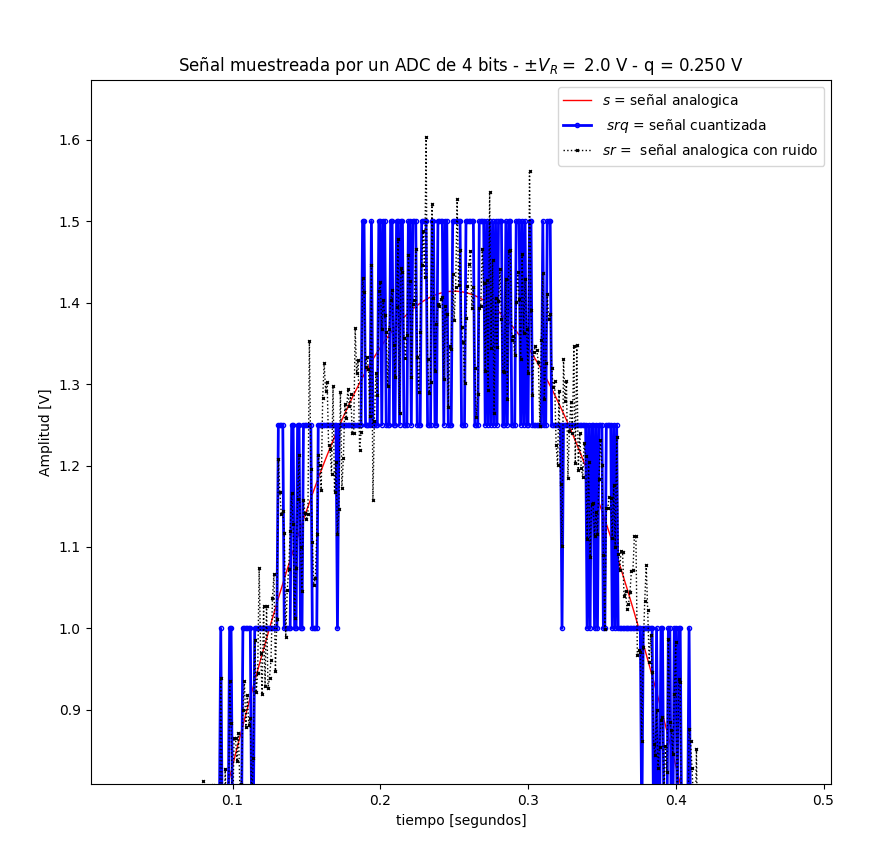


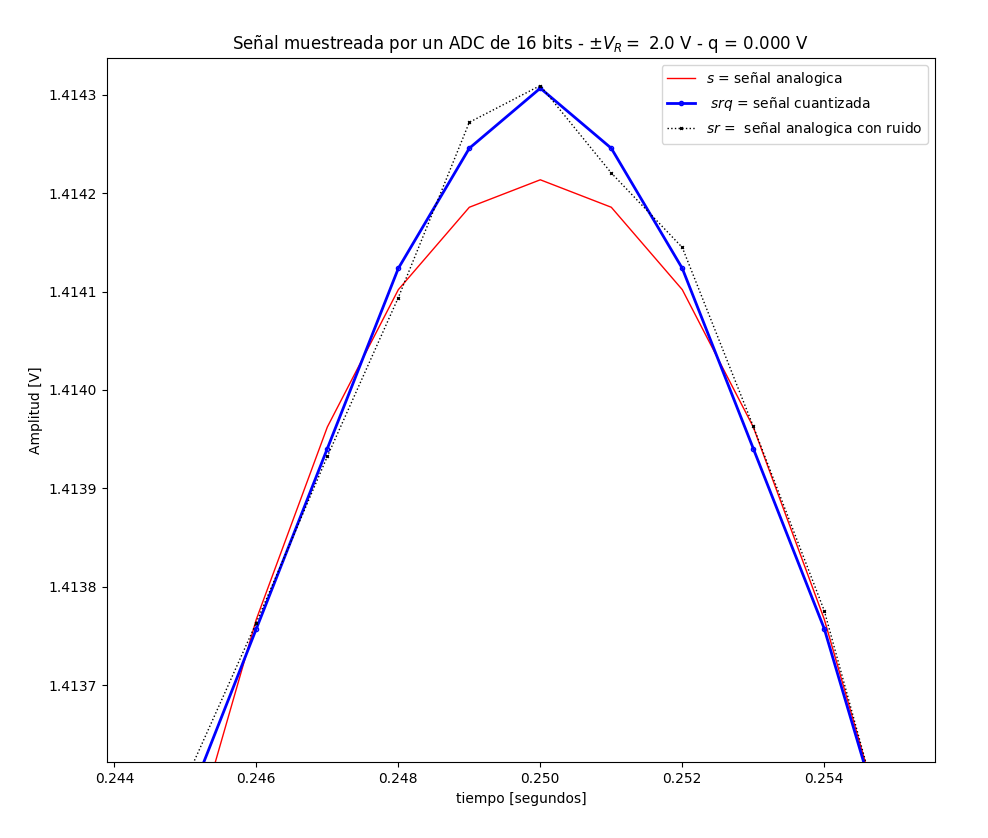

Para ilustrar mejor este efecto, realizamos un zoom sobre el comportamiento del conversor ADC de 4 bits con Kn=1 y el ADC de 16 bits con  Kn=10. Al observar los resultados, es evidente que, en el caso del ADC de 16 bits, se requiere un zoom mayor debido a que el paso de cuantización es tan pequeño que la variación entre los puntos muestreados y cuantizados es mínima. Esto implica que el ruido de cuantización en este caso es prácticamente imperceptible. En contraste, el ruido en el ADC de 4 bits es mucho más significativo, lo que resalta la importancia de un paso de cuantización pequeño para reducir el ruido en la señal digitalizada.

# BONUS

### Encontrar la relación entre la cantidad de B bits del ADC y el SNR de la señal digitalizada.

Partimos de la relación señal-ruido en función de la potencia:
$$ SNR = \frac{P_x}{P_{n_q}} $$
Para encontrar la relación con la cantidad de bits del ADC, escribimos la potencia del ruido de cuantización como:
$$ P_{n_q} = \frac{q^2}{12} $$
Entonces:
$$ SNR = \frac{1}{P_{n_q}} = \frac{1}{\frac{q^2}{12}} $$
$$ SNR = \frac{12}{q^2} $$
Teniendo en cuenta que el paso de cuantización $q$ está dado por:
$$ q = \frac{V_f}{2^{B-1}} $$
Sustituyendo en la ecuación del \( SNR \):
$$ SNR = \frac{12}{\left( \frac{V_f}{2^{B-1}} \right)^2} $$
$$ SNR = \frac{12 \cdot 2^{2(B-1)}}{V_f^2} $$
Expresándolo en decibeles:
$$ SNR_{\text{dB}} = 10 \log_{10} (SNR) $$
$$ SNR_{\text{dB}} = 10 \log_{10} \left( 12 \cdot 2^{2B} \right) - 10 \log_{10} (V_f^2) $$
$$ SNR_{\text{dB}} = 10.8 + 6.02 B - 10 \log_{10} (V_f^2) $$
Para señales normalizadas:
$$ SNR_{\text{dB}} = 6.02 B + 1.76 $$

Esto significa que un ADC con más bits proporciona una mejor relación señal-ruido, reduciendo los efectos del ruido de cuantización. Sabemos que cuanto más bits, menor q, por lo que impplica menor error de cuantizacion.

Aunque la pendiente de la función de cuantización aumenta, esto no implica más ruido, sino una mejor aproximación a la señal original. 

### Simular el efecto del aliasing junto con el muestreo.

In [1]:
#%% Datos de la simulacion 

#Datos para el muestreo (sampleo)
fs = 1000 # frecuencia de muestreo (Hz) conviene numero entero conocido 
N = 1000 # cantidad de muestras
 

#Proceso de CUANTIFICACION
# Datos del ADC
B = 4  # bits
Vf = 2 # rango simétrico de +/- Vf Volts
q =  Vf/2**(B-1) # paso de cuantización de q Volts

#Generacion de ruido
pot_ruido_cuant = (q**(2))/12  # Watts 
kn = 1 # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 

ts = 1/fs # tiempo de muestreo
df =  fs/N # resolución espectral

In [10]:
# %% Llamada a la función y procesamiento
tt, xx = mi_funcion_sen(vmax=2, dc=0, ff=500, ph=0, nn=N, fs=fs)

# Normalizamos la función con el desvío estándar
xn = xx / np.std(xx)
#De esta manera, la varianza es unitaria, y la potencia de 1W

In [11]:
#%% Experimento 

# Señal analogica
analog_sig = xn

#Generacion de ruido analogico aleatorio
nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)

#Señal analogica con ruido 
sr = analog_sig + nn 


#Señal cuantizada con ruido
srq = np.round(sr/q)*q 

#Ruido de cuantizacion
nq =  srq -sr

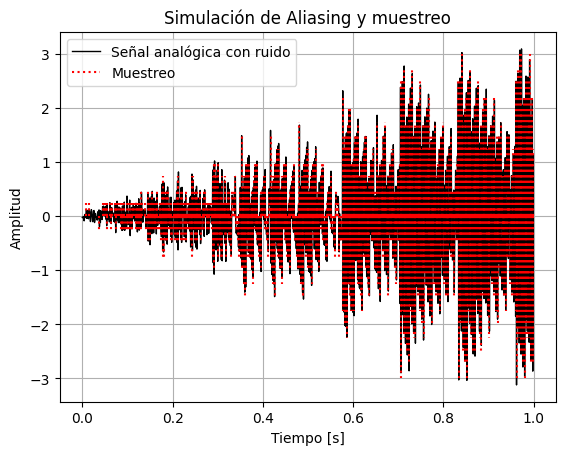

In [13]:
#%% Graficar los resultados

plt.figure()

# Señales 
plt.plot(tt, sr, label='Señal analógica con ruido', color= 'black', linewidth=1)
plt.vlines(tt, ymin=0, ymax=srq, colors='r', linestyles='dotted', label='Muestreo')

# Títulos y etiquetas
plt.title('Simulación de Aliasing y muestreo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Cuando se muestrea una señal senoidal manteniendo fija la frecuencia de muestreo fs=1000 Hz y el número total de muestras N=1000, el comportamiento de la señal reconstruida depende en gran medida de la frecuencia f de la señal original. Este análisis se basa en el teorema de muestreo de Nyquist-Shannon, el cual establece que para poder reconstruir correctamente una señal, la frecuencia de muestreo debe ser al menos el doble de la máxima frecuencia presente en la señal.

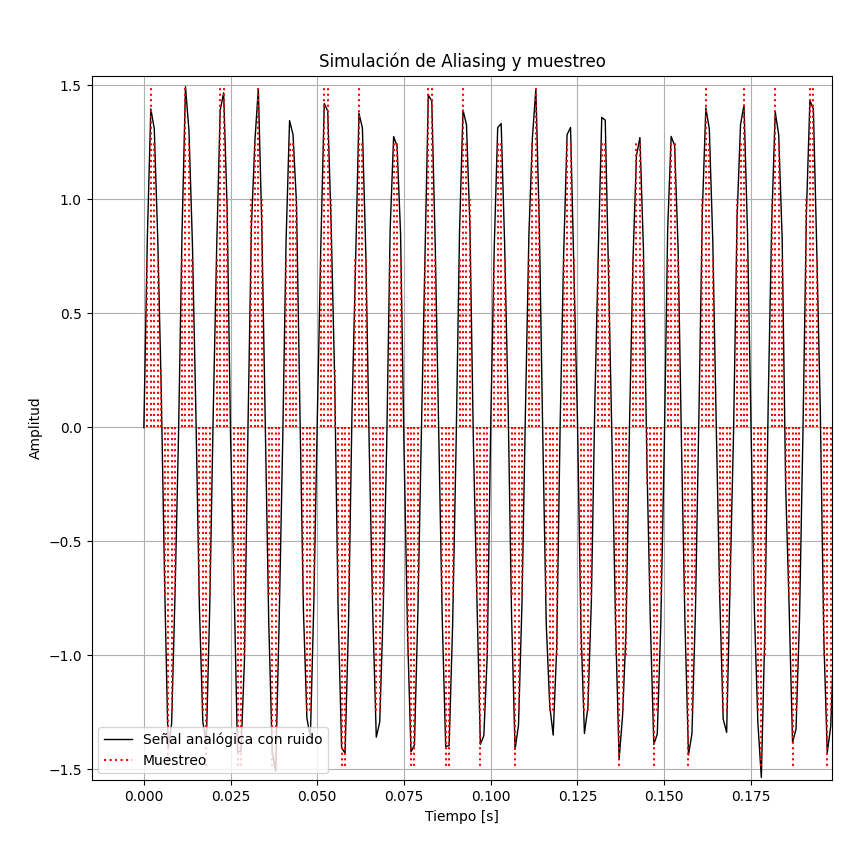

Cuando la frecuencia de la señal es de 100 Hz, está bien por debajo del límite de Nyquist. Se obtienen 10 muestras por ciclo, lo cual permite una representación clara y periódica de la forma de onda. Aun así, si la cantidad de muestras por ciclo es baja, la forma reconstruida podría parecer más parecida a una señal triangular que a una senoidal, debido al efecto visual de la interpolación entre puntos separados.

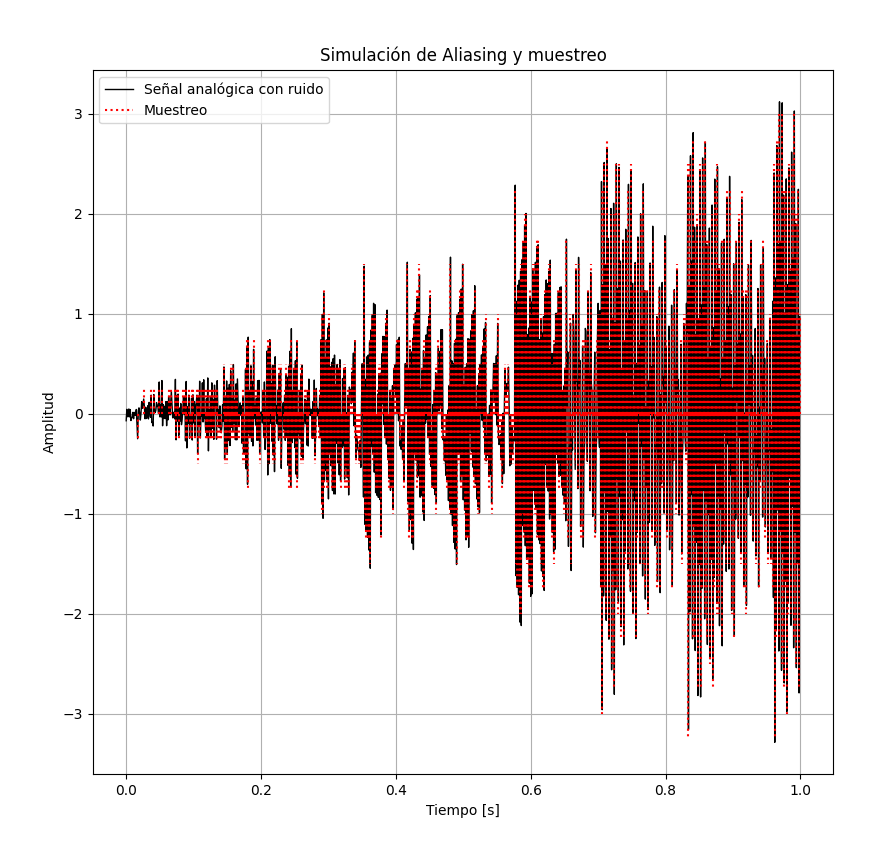

En este caso, solo se obtienen dos muestras por ciclo. Esto genera ambigüedad en la reconstrucción, ya que no hay suficiente información para distinguir entre distintas formas de onda. Suele suceder esto cuando estamos justo sobre nyquist. 

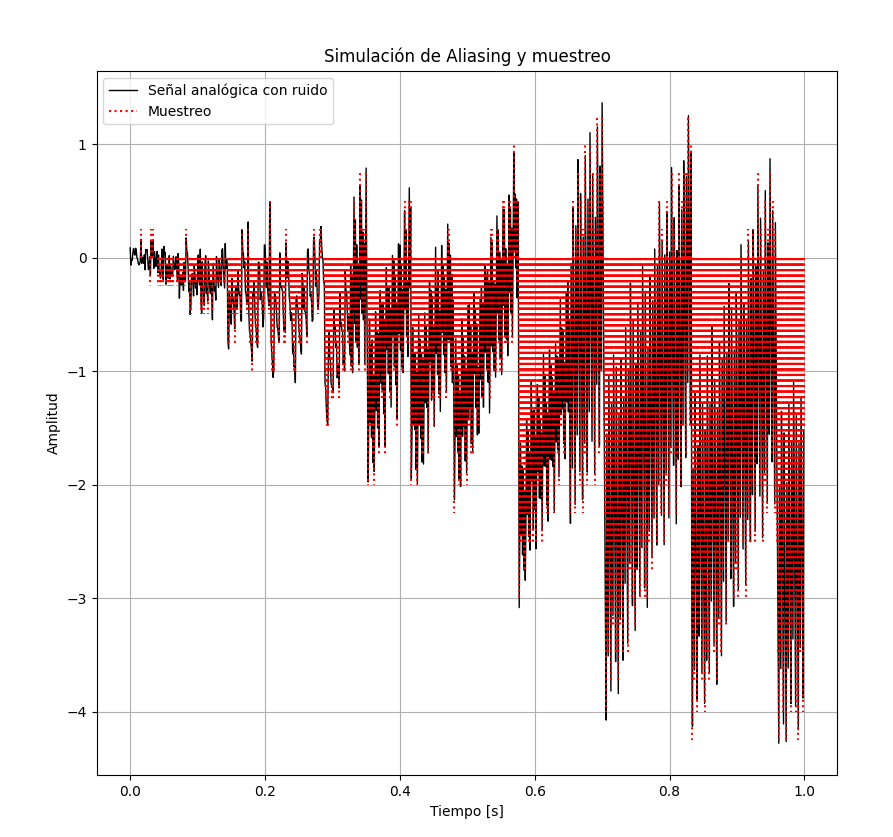

Aquí se produce un muestreo  por ciclo, lo que significa que todas las muestras caen en la misma posición del ciclo de la onda. En teoría, esto resultaría en un valor constante (si la fase inicial es la misma en cada ciclo), pero cualquier desfase introduce variaciones que pueden verse como una señal extraña o como si la amplitud cambiara de forma inesperada.

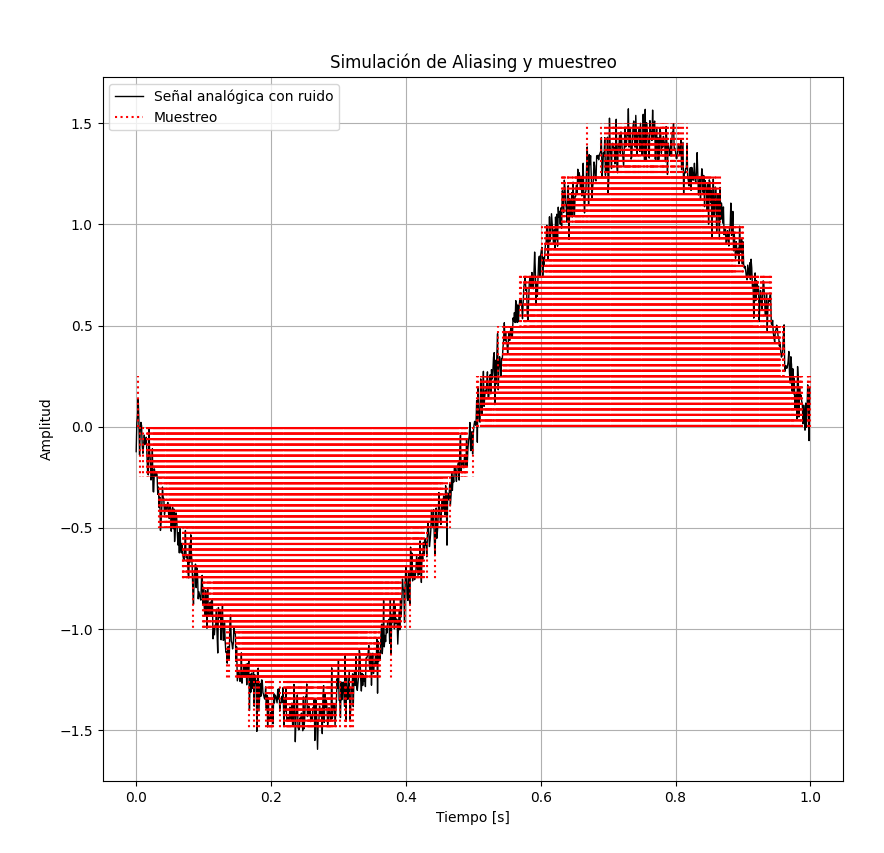  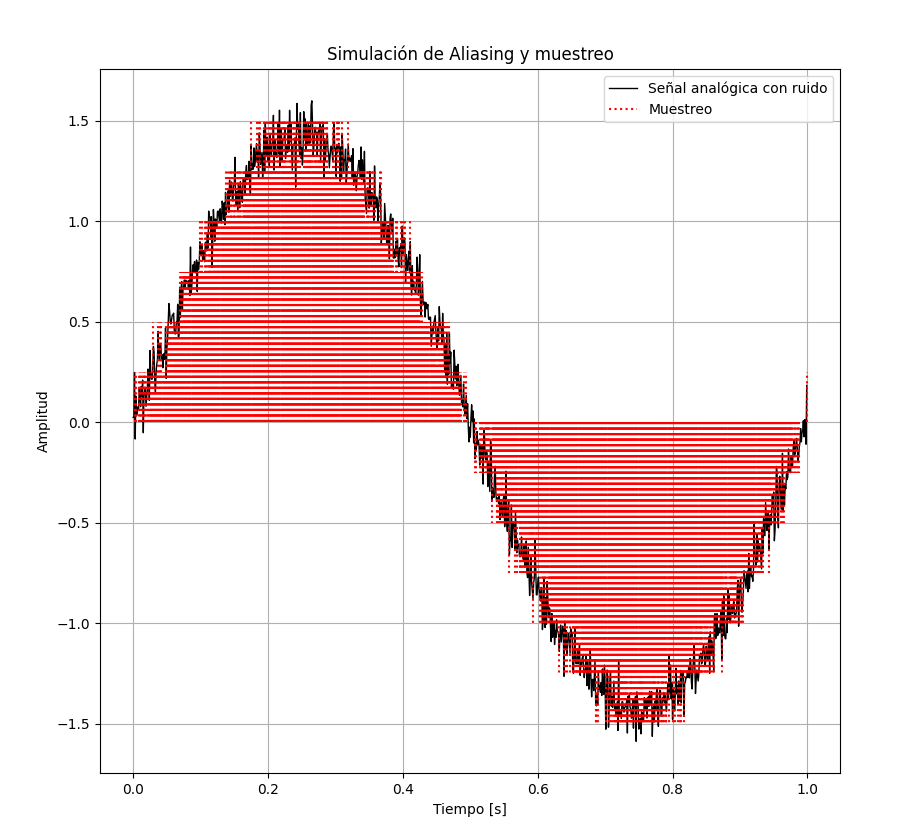

Ambas señales están por encima del límite de Nyquist, por lo tanto, se produce aliasing. Esto hace que el sistema interprete la señal como si tuviera una frecuencia más baja. Así, tanto 999 Hz como 1001 Hz se perciben como señales de 1 Hz, aunque con diferente fase. Esto explica por qué visualmente se observan como señales senoidales de baja frecuencia, pero desplazadas entre sí. Esto sucede porque: 

$$ f_{\text{alias}} = \left| f - k \cdot f_s \right|$$

Además, si hacemos zoom en una señal con aliasing podemos observar que las muestras no son equidistantes; esto sucede porque cuando cuando la frecuencia de la señal se aproxima a la frecuencia de Nyquist o la supera, se reduce significativamente la cantidad de muestras por ciclo. Esta reducción provoca que las muestras capturadas no coincidan con puntos característicos (como máximos o cruces por cero), lo que distorsiona la forma reconstruida. Como consecuencia, las muestras parecen perder periodicidad: no porque realmente no sean periódicas, sino porque al tener pocos puntos por ciclo, se interpolan de manera incorrecta o ambigua. 

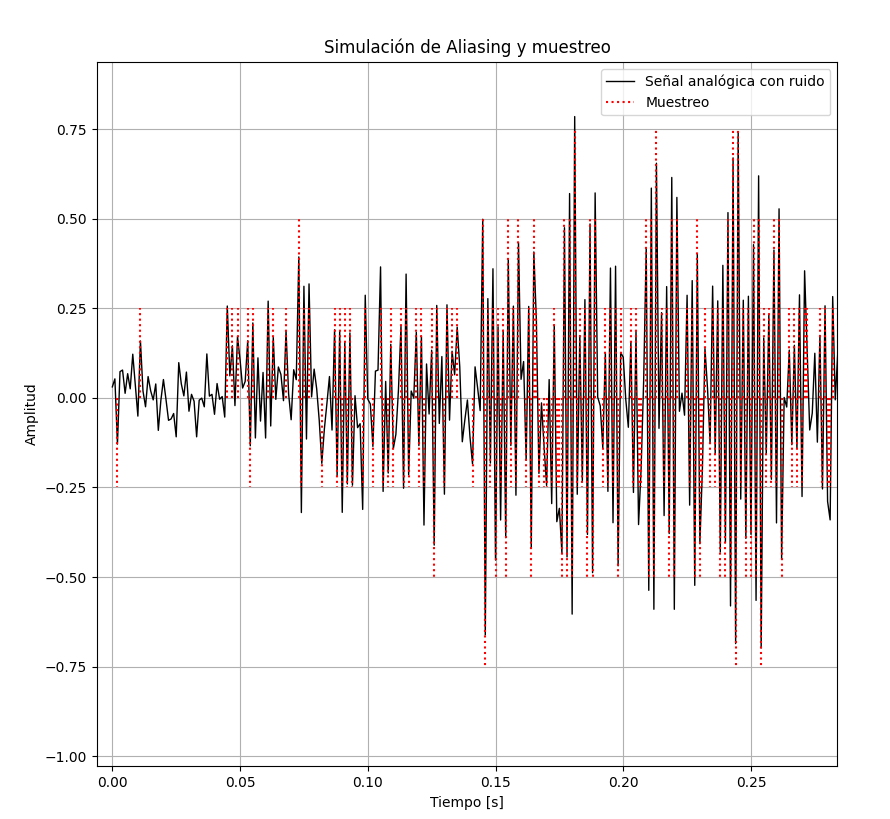

Además, si la frecuencia de la señal no es múltiplo exacto de la frecuencia de muestreo, las muestras no caen en puntos equidistantes dentro del ciclo de la señal original.